# Detect red pixels in an image

## Import some libraries

In [1]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load an image without red pixel

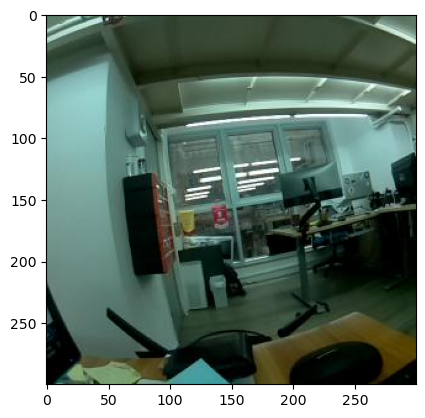

In [2]:
img = cv2.imread("resource/image_no_finish_line.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
def red_mask(img):
    lower_red = np.array([0,100,100])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
    
    lower_red = np.array([170,100,100])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    return mask0, mask1

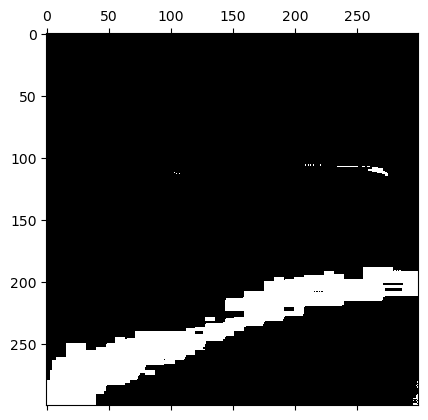

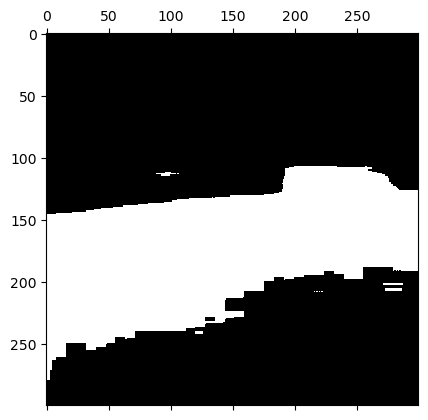

In [13]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

mask0, mask1 = red_mask(img_hsv)

plt.matshow(mask0, cmap = 'gray')
plt.matshow(mask1, cmap = 'gray')

## Join the mask and cut the upper part

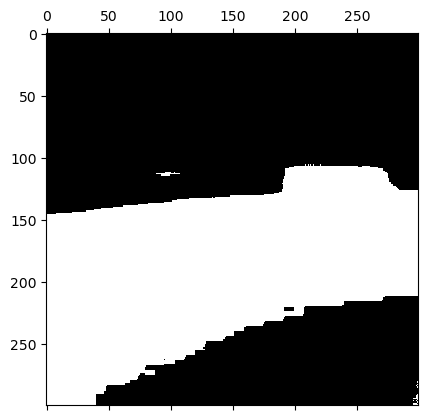

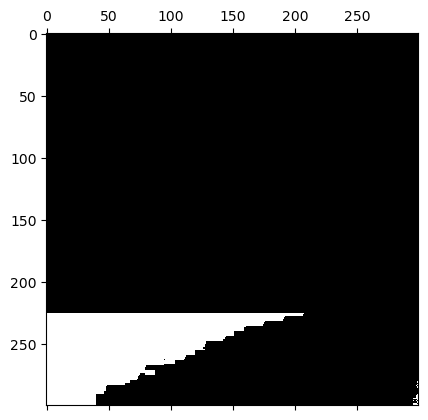

In [14]:
 # join my masks
mask = mask0+mask1

# Mask top 3/4 portion
mask_percent = 0.75
height, width = mask.shape
plt.matshow(mask, cmap = 'gray')

#  Fill up the top 3/4 with blank (0,0)
mask = cv2.rectangle(mask, (0, 0), (width, int(height * mask_percent)), 0, -1)
plt.matshow(mask, cmap = 'gray')


In [5]:
tot_pixel = int(height * (1-mask_percent)) * width  # total pixel of the ROI (Region of Interest)
red_pixel = np.count_nonzero(mask)
if ((red_pixel / tot_pixel) > 0.2):
    print("{} finishing line detected".format(time.time()))
print(f"Number of red pixels: {red_pixel}")
print(f"Number of all pixels: {tot_pixel}")

Number of red pixels: 0
Number of all pixels: 22500


## Exercise #1

Now copy the code above and calculate the number of red pixel in the image given below

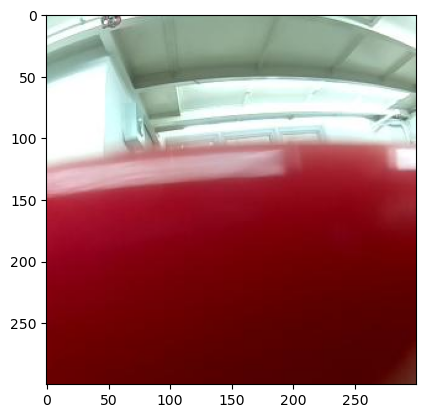

In [17]:
img = cv2.imread("resource/image_finish_line.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Finishing line detected
Number of red pixels: 8015
Number of all pixels: 22500


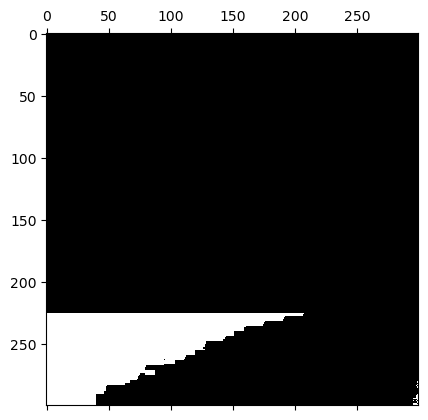

In [20]:
## Answer

img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

mask0, mask1 = red_mask(img_hsv)

 # join my masks
mask = mask0+mask1

# Mask top 3/4 portion
mask_percent = 0.75
height, width = mask.shape

#  Fill up the top 3/4 with blank (0,0)
mask = cv2.rectangle(mask, (0, 0), (width, int(height * mask_percent)), 0, -1)
plt.matshow(mask, cmap = 'gray')

tot_pixel = int(height * (1-mask_percent)) * width  # total pixel of the ROI (Region of Interest)
red_pixel = np.count_nonzero(mask)
if ((red_pixel / tot_pixel) > 0.2):
    print("Finishing line detected")
print(f"Number of red pixels: {red_pixel}")
print(f"Number of all pixels: {tot_pixel}")



## Add Camera

The following code is copied from donkey car source code.

https://github.com/robocarstore/donkeycar/blob/v5/donkeycar/templates/complete.py#L828

In [6]:
def add_camera(V, cfg, camera_type):
    logger.info("cfg.CAMERA_TYPE %s"%cfg.CAMERA_TYPE)
    
    inputs = []
    outputs = ['cam/image_array']
    threaded = True
    cam = get_camera(cfg)
    if cam:
        V.add(cam, inputs=inputs, outputs=outputs, threaded=threaded)
    if cfg.BGR2RGB:
        from donkeycar.parts.cv import ImgBGR2RGB
        V.add(ImgBGR2RGB(), inputs=["cam/image_array"], outputs=["cam/image_array"])


def get_camera(cfg):
    from donkeycar.parts.camera import PiCamera
    cam = PiCamera(image_w=cfg.IMAGE_W, image_h=cfg.IMAGE_H, image_d=cfg.IMAGE_DEPTH,
                   vflip=cfg.CAMERA_VFLIP, hflip=cfg.CAMERA_HFLIP)

    return cam

## Add webcontroller

In [ ]:
from donkeycar.parts.controller import LocalWebController

In [ ]:
## Reading myconfig.py

In [ ]:
## Putting them together

